# Bayesian Statistics

The following example and exercise are aimed to refresh your mind on some of the key statistical distributions. You will use [SciPy statistical function](https://docs.scipy.org/doc/scipy/reference/stats.html) module and work with several probability distributions through the following steps: 

- Generating the mean, variance, skewness, andr kurtosis of each distribution
- Drawing a sample from each distribution and plotting it

Let's start by importing the necessary libraries

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, beta, bernoulli, norm, t, binom

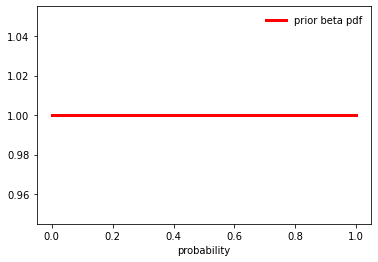

In [23]:
# set the boundaries (-inf < a < b < inf)
a0, b0 = 1, 1

# plot probability distribution
x = np.linspace(0,1,100)

plt.plot(x, beta.pdf(x, a0,b0), 'r-', label='prior beta pdf',lw=3)
plt.xlabel('probability')
plt.ylabel('')
plt.title('')
plt.legend(loc='best', frameon=False)

plt.show()

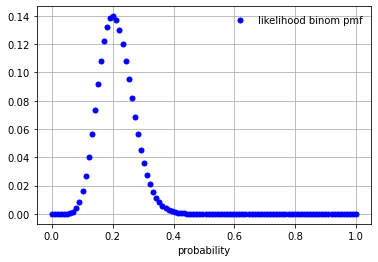

In [24]:
n, heads = 50, 10

plt.plot(x, binom.pmf(heads, n, x), 'bo', ms=5, label='likelihood binom pmf')
plt.legend(loc='best', frameon=False)
plt.xlabel('probability')
plt.grid()
plt.show()

11

41

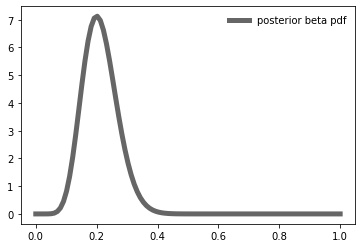

In [25]:
# set the boundaries (a>0, b>0)
a, b = a0 + heads, n - heads + b0
display(a,b)

plt.plot(x, beta.pdf(x, a, b), 'k-', lw=5, alpha=0.6, label='posterior beta pdf')
plt.legend(loc='best', frameon=False)
plt.show()

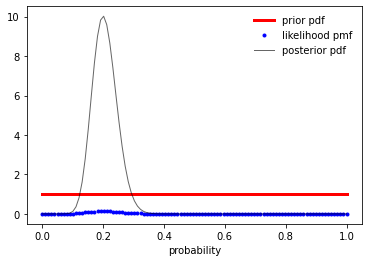

In [26]:
# plot probability distribution
p = np.linspace(0,1,100)

plt.plot(p, beta.pdf(p, a0,b0), 'r-', label='prior pdf',lw=3)
plt.plot(p, binom.pmf(heads, n, p), 'bo', ms=3, label='likelihood pmf')
plt.plot(p, beta.pdf(p, a+heads, b+n-heads), 'k-', lw=1, alpha=0.6, label='posterior pdf')

plt.xlabel('probability')
plt.ylabel('')
plt.title('')
plt.legend(loc='best', frameon=False)

plt.show()

In [22]:
a,b

(11, 41)

## Exercises
- change the prior distribution: informative priors vs uninformative priors e.g. uniform distribution https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference
- impact of sample size